<a href="https://colab.research.google.com/github/SanyuktaaNath/FAAD-Files/blob/main/outlier_zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
df = pd.read_csv('/gdrive/MyDrive/deeplearning/placement.csv')

In [5]:
df.shape

(1000, 3)

In [6]:
df.sample(5)

,cgpa,placement_exam_marks,placed
93,7.00,30.0,0
881,7.72,42.0,0
102,5.92,22.0,1
770,7.33,67.0,1
791,7.65,12.0,1


<ipython-input-7-de614b1f4e84>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-7-de614b1f4e84>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


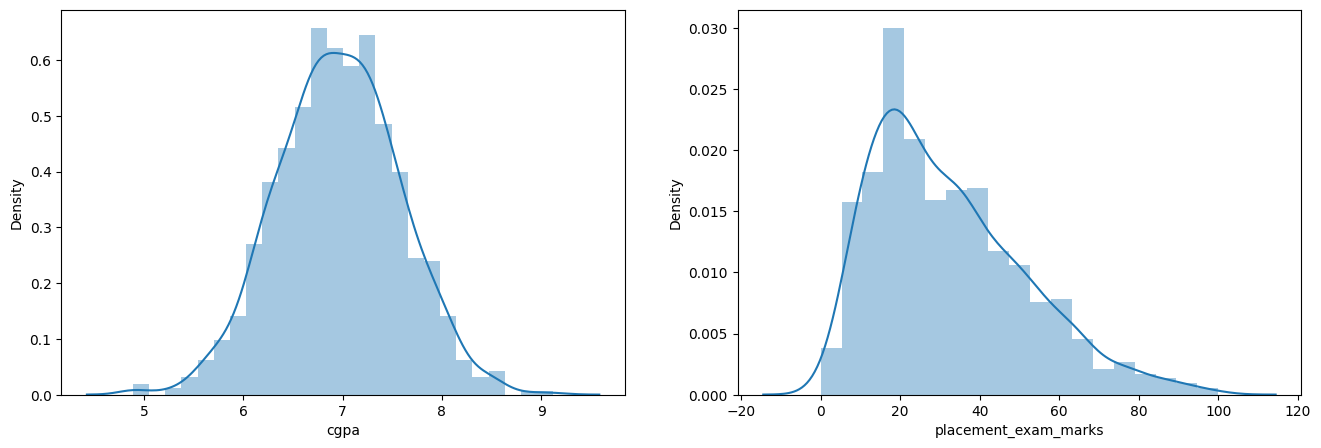

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [8]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [9]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [10]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [11]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


from matplotlib import pyplot as plt
_df_0['cgpa'].plot(kind='hist', bins=20, title='cgpa')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['placement_exam_marks'].plot(kind='hist', bins=20, title='placement_exam_marks')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['placed'].plot(kind='hist', bins=20, title='placed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='cgpa', y='placement_exam_marks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='placement_exam_marks', y='placed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['cgpa'].plot(kind='line', figsize=(8, 4), title='cgpa')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['placement_exam_marks'].plot(kind='line', figsize=(8, 4), title='placement_exam_marks')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['placed'].plot(kind='line', figsize=(8, 4), title='placed')
plt.gca().spines[['top', 'right']].set_visible(False)

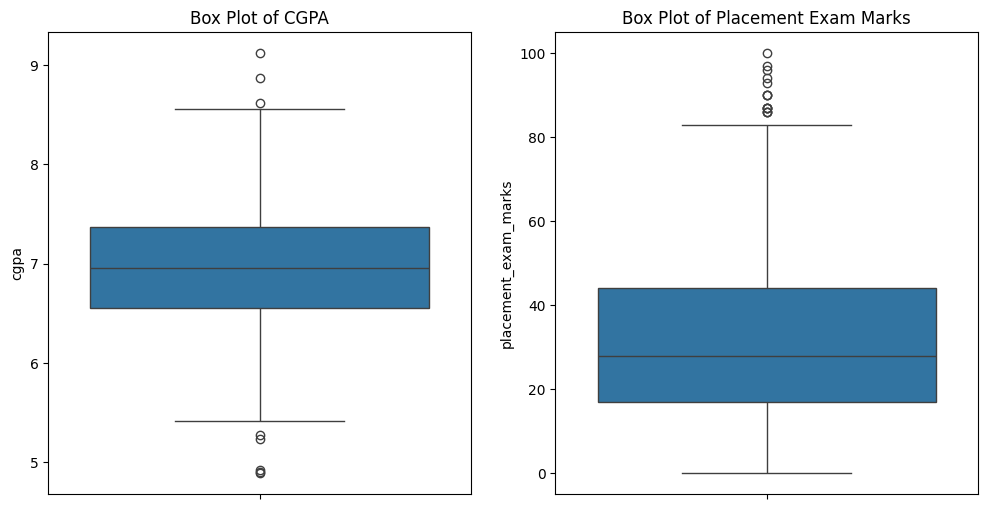

Number of outliers in CGPA: 8
Number of outliers in Placement Exam Marks: 15


In [14]:
# prompt: Draw a box plot for cgpa and exam marks. Also give the no. of outliers

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['cgpa'])
plt.title('Box Plot of CGPA')

plt.subplot(1, 2, 2)
sns.boxplot(df['placement_exam_marks'])
plt.title('Box Plot of Placement Exam Marks')

plt.show()

# Calculate the number of outliers for CGPA
Q1_cgpa = df['cgpa'].quantile(0.25)
Q3_cgpa = df['cgpa'].quantile(0.75)
IQR_cgpa = Q3_cgpa - Q1_cgpa
lower_bound_cgpa = Q1_cgpa - 1.5 * IQR_cgpa
upper_bound_cgpa = Q3_cgpa + 1.5 * IQR_cgpa
outliers_cgpa = df[(df['cgpa'] < lower_bound_cgpa) | (df['cgpa'] > upper_bound_cgpa)]
num_outliers_cgpa = len(outliers_cgpa)

# Calculate the number of outliers for Placement Exam Marks
Q1_marks = df['placement_exam_marks'].quantile(0.25)
Q3_marks = df['placement_exam_marks'].quantile(0.75)
IQR_marks = Q3_marks - Q1_marks
lower_bound_marks = Q1_marks - 1.5 * IQR_marks
upper_bound_marks = Q3_marks + 1.5 * IQR_marks
outliers_marks = df[(df['placement_exam_marks'] < lower_bound_marks) | (df['placement_exam_marks'] > upper_bound_marks)]
num_outliers_marks = len(outliers_marks)

print(f"Number of outliers in CGPA: {num_outliers_cgpa}")
print(f"Number of outliers in Placement Exam Marks: {num_outliers_marks}")

## Trimming

In [15]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [ ]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [ ]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [ ]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [ ]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [ ]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [ ]:
lower_limit

5.113546374602832

In [ ]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [ ]:
df.shape

(1000, 4)

In [ ]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64